In [1]:
import torch
import numpy as np

def generate_data(seq_len: int, num_samples: int):
    X = []
    y = []
    for i in range(num_samples):
        start = np.random.normal(0, 4) * 2 * np.pi
        sequence = np.sin(np.linspace(start, start + seq_len * 0.1, seq_len))
        X.append(sequence)
        y.append(np.sin(start + seq_len * 0.1))
    # end for
    return np.array(X), np.array(y)
# end def

seq_len = 20 
num_samples = 500 
input_size = 1
hidden_size = 50
output_size = 1
num_layers = 2
epochs = 200
batch_size = 2

X, y = generate_data(seq_len, num_samples)

X_train = torch.tensor(X[:450], dtype = torch.float32).unsqueeze(-1)
y_train = torch.tensor(y[:450], dtype = torch.float32).unsqueeze(-1)

X_test = torch.tensor(X[450:], dtype = torch.float32).unsqueeze(-1)
y_test = torch.tensor(y[450:], dtype = torch.float32).unsqueeze(-1)

In [ ]:
from Models.ModelWrapper import ModelWrapper

args = {
    'hidden_size' : 25,
    'num_layers' : 3,
    'seq_len' : 20,
    'optimazer' : 'rmsprop',
    'use_batch_norm' : True,
    'dropout_rate' : 0.4
}

model = ModelWrapper(type = 'lstm', **args)

model.fit(X = X_train, 
          y = y_train, 
          epochs = epochs, 
          batch_size = batch_size, 
          verbose = True,
          X_val = X_test,
          y_val = y_test)
model.score(X = X_test, y = y_test)

Epoch [1/200], Loss: 0.2854986226887235, Val Loss: 0.0755893886089325
Epoch [2/200], Loss: 0.30054080695845187, Val Loss: 0.017940383404493332
Epoch [3/200], Loss: 0.27505636036202, Val Loss: 0.13502733409404755
Epoch [4/200], Loss: 0.24201752361155943, Val Loss: 0.008706167340278625
Epoch [5/200], Loss: 0.2431607523031481, Val Loss: 0.018534718081355095
Epoch [6/200], Loss: 0.28574217012462516, Val Loss: 0.0569927878677845
Epoch [7/200], Loss: 0.2596957118218092, Val Loss: 0.09342528134584427
Epoch [8/200], Loss: 0.2349385336248411, Val Loss: 0.34086933732032776
Epoch [9/200], Loss: 0.2580157130796255, Val Loss: 0.11166723072528839
Epoch [10/200], Loss: 0.24104058636895692, Val Loss: 0.01657884195446968
Epoch [11/200], Loss: 0.27791400416660406, Val Loss: 0.03480875864624977
Reduced learning rate to 0.0001
Epoch [12/200], Loss: 0.23172239919257764, Val Loss: 0.0005592253291979432
Epoch [13/200], Loss: 0.25926145705504394, Val Loss: 0.0011602310696616769
Epoch [14/200], Loss: 0.2615720

0.0028225427959114313

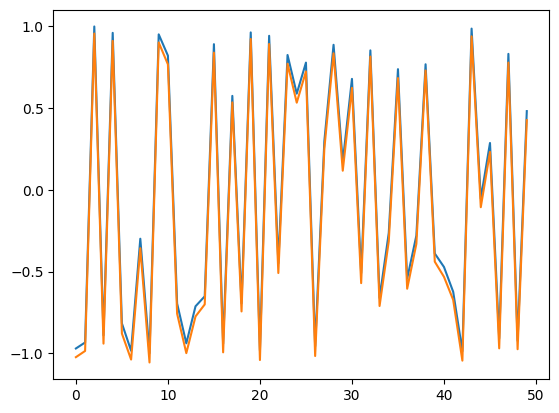

In [ ]:
import matplotlib.pyplot as plt

pred = list(map(float, model.predict(X = X_test)))
true = list(map(float, y_test))

plt.plot(np.arange(len(pred)), true)
plt.plot(np.arange(len(pred)), pred)

In [ ]:
args = {
    'hidden_size' : 25,
    'num_layers' : 3,
    'seq_len' : 20,
    'optimazer' : 'rmsprop',
    'use_batch_norm' : False,
    'dropout_rate' : 0.1
}

model = ModelWrapper(type = 'gru', **args)

model.fit(X = X_train, 
          y = y_train, 
          epochs = epochs, 
          batch_size = batch_size, 
          verbose = True,
          X_val = X_test,
          y_val = y_test)
model.score(X = X_test, y = y_test)

Epoch [1/200], Loss: 0.06465398032625672, Val Loss: 0.013329830020666122
Epoch [2/200], Loss: 0.009522916691288023, Val Loss: 0.0033284705132246017
Epoch [3/200], Loss: 0.007332922829874506, Val Loss: 0.0011926247971132398
Epoch [4/200], Loss: 0.00639066317579515, Val Loss: 0.0016979011707007885
Epoch [5/200], Loss: 0.0062828594490808125, Val Loss: 0.0035107675939798355
Epoch [6/200], Loss: 0.005895590088540403, Val Loss: 0.010628794319927692
Epoch [7/200], Loss: 0.005373342494575707, Val Loss: 0.0005785254179500043
Epoch [8/200], Loss: 0.005550465376019452, Val Loss: 0.0008684817585162818
Epoch [9/200], Loss: 0.004861029486314186, Val Loss: 0.001967445481568575
Epoch [10/200], Loss: 0.0054886405772835035, Val Loss: 0.0013264421140775084
Epoch [11/200], Loss: 0.004305532220672224, Val Loss: 0.0007185329450294375
Epoch [12/200], Loss: 0.004507048918688573, Val Loss: 0.00042869095341302454
Epoch [13/200], Loss: 0.0041209639289647585, Val Loss: 0.0013617700897157192
Epoch [14/200], Loss: 

2.2713760699843988e-05

In [ ]:
from sklearn.metrics import mean_squared_error

pred = list(map(float, model.predict(X = X_test)))
true = list(map(float, y_test))
mse = mean_squared_error(true, pred)
print(f'{mse:10f}')

  0.000023


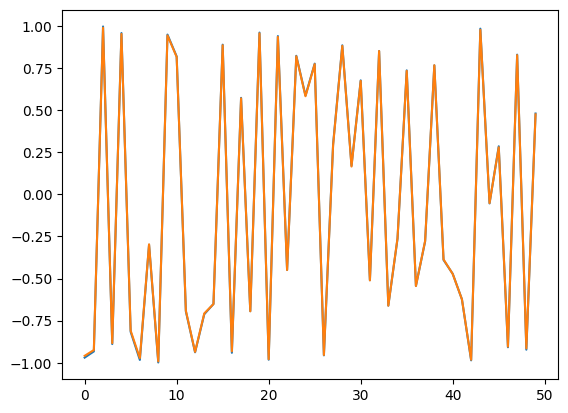

In [ ]:
plt.plot(np.arange(len(pred)), true)
plt.plot(np.arange(len(pred)), pred)

In [4]:
from DataLoaders.DataLoaderWrapper import DataLoaderWrapper

wrapper = DataLoaderWrapper(period = 'post', do_scale = True)
df = wrapper.get_data()
df

,Date,Cost
1587,2022-05-07,0.146454
1588,2022-05-08,0.146454
1589,2022-05-09,0.146454
1590,2022-05-10,0.148552
1591,2022-05-11,0.199748
...,...,...
2452,2024-09-18,0.829731
2453,2024-09-19,0.830571
2454,2024-09-20,0.846832
2455,2024-09-21,0.846832
